<a href="https://colab.research.google.com/github/abdyraman/quantium/blob/main/quantium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn for improved visualizations
import re

In [2]:
behaviors_df=pd.read_csv('QVI_purchase_behaviour.csv')
transactions_df=pd.read_excel('QVI_transaction_data.xlsx')

In [3]:
behaviors_df.isnull().sum()
behaviors_df.dtypes
behaviors_df.sample(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
46666,174327,YOUNG SINGLES/COUPLES,Premium
59672,225229,YOUNG SINGLES/COUPLES,Mainstream
6140,22208,YOUNG SINGLES/COUPLES,Budget
21736,79184,YOUNG SINGLES/COUPLES,Mainstream
43643,165049,RETIREES,Budget
49476,185183,OLDER SINGLES/COUPLES,Mainstream
2738,9152,OLDER FAMILIES,Budget
3681,13133,OLDER SINGLES/COUPLES,Mainstream
7350,26219,RETIREES,Budget
22305,81018,OLDER FAMILIES,Budget


In [4]:
duplicate_rows = behaviors_df[behaviors_df.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))


Number of duplicate rows: 0


The first step in any analysis is to first understand the data. Let's take a look
at each of the datasets provided.

In [5]:
transactions_df.isnull().sum()
transactions_df.dtypes
transactions_df.sample(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
42215,43386,107,107167,109287,74,Tostitos Splash Of Lime 175g,2,8.8
159536,43569,110,110058,112038,86,Cheetos Puffs 165g,2,5.6
45862,43365,155,155077,155498,88,Kettle Honey Soy Chicken 175g,2,10.8
17330,43334,4,4203,3563,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8
150535,43602,78,78014,75551,47,Doritos Corn Chips Original 170g,1,4.4
86364,43452,79,79050,77049,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6
35544,43485,39,39236,36082,98,NCC Sour Cream & Garden Chives 175g,2,6.0
119890,43552,32,32085,28524,96,WW Original Stacked Chips 160g,2,3.8
7917,43542,62,62181,58871,39,Smiths Crinkle Cut Tomato Salsa 150g,2,5.2
146959,43409,212,212193,211534,75,Cobs Popd Sea Salt Chips 110g,2,7.6


We can see that the date column is in an integer format. Let's change this to a
date format.

In [6]:
transactions_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [7]:
# Assuming transactions_df is your DataFrame
transactions_df['DATE'] = pd.to_datetime(transactions_df['DATE'], unit='D', origin='1900-01-01')

In [8]:
duplicate_rows_tra = transactions_df[transactions_df.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))

Number of duplicate rows: 0


In [9]:
behaviors_df.sample(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
38288,143160,YOUNG SINGLES/COUPLES,Mainstream
46445,174046,YOUNG FAMILIES,Mainstream
24126,88031,OLDER SINGLES/COUPLES,Mainstream
59887,226195,MIDAGE SINGLES/COUPLES,Mainstream
18884,69060,OLDER SINGLES/COUPLES,Mainstream
46054,172182,OLDER SINGLES/COUPLES,Premium
67979,254422,OLDER FAMILIES,Mainstream
1904,6399,MIDAGE SINGLES/COUPLES,Mainstream
2794,9228,MIDAGE SINGLES/COUPLES,Mainstream
53264,200206,OLDER FAMILIES,Budget


In [10]:
for col in behaviors_df.columns:
        print(col, behaviors_df[col].unique())

LYLTY_CARD_NBR [   1000    1002    1003 ... 2370751 2370961 2373711]
LIFESTAGE ['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']
PREMIUM_CUSTOMER ['Premium' 'Mainstream' 'Budget']


In [11]:
transactions_df.sample(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
240847,2018-08-02,29,29350,26438,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
252917,2019-02-05,199,199069,197867,57,Old El Paso Salsa Dip Tomato Mild 300g,2,10.2
121797,2018-09-29,63,63019,59452,96,WW Original Stacked Chips 160g,2,3.8
176124,2018-12-02,81,81168,80502,63,Kettle 135g Swt Pot Sea Salt,2,8.4
145171,2018-09-18,176,176048,177001,29,French Fries Potato Chips 175g,1,3.0
238104,2018-08-18,133,133034,136176,88,Kettle Honey Soy Chicken 175g,1,5.4
180206,2019-06-27,172,172129,173524,73,Smiths Crinkle Cut Salt & Vinegar 170g,2,5.8
43119,2018-12-15,116,116172,120179,13,Red Rock Deli Thai Chilli&Lime 150g,2,5.4
35838,2018-09-12,43,43104,39292,43,Smith Crinkle Cut Bolognese 150g,2,5.2
57059,2018-08-11,33,33144,30374,10,RRD SR Slow Rst Pork Belly 150g,2,5.4


In [12]:
for col in transactions_df.columns:
        print(col, transactions_df[col].unique())

DATE ['2018-10-19T00:00:00.000000000' '2019-05-16T00:00:00.000000000'
 '2019-05-22T00:00:00.000000000' '2018-08-19T00:00:00.000000000'
 '2018-08-20T00:00:00.000000000' '2019-05-21T00:00:00.000000000'
 '2019-05-18T00:00:00.000000000' '2018-08-22T00:00:00.000000000'
 '2019-05-19T00:00:00.000000000' '2019-05-20T00:00:00.000000000'
 '2019-05-17T00:00:00.000000000' '2018-08-16T00:00:00.000000000'
 '2018-08-18T00:00:00.000000000' '2018-08-21T00:00:00.000000000'
 '2018-08-17T00:00:00.000000000' '2019-06-19T00:00:00.000000000'
 '2018-09-07T00:00:00.000000000' '2018-09-29T00:00:00.000000000'
 '2019-03-01T00:00:00.000000000' '2019-03-21T00:00:00.000000000'
 '2019-06-18T00:00:00.000000000' '2018-11-27T00:00:00.000000000'
 '2018-11-12T00:00:00.000000000' '2019-03-11T00:00:00.000000000'
 '2018-11-03T00:00:00.000000000' '2019-03-15T00:00:00.000000000'
 '2019-04-08T00:00:00.000000000' '2018-08-01T00:00:00.000000000'
 '2018-10-20T00:00:00.000000000' '2018-11-07T00:00:00.000000000'
 '2019-03-06T00:00:0

In [13]:
# Filter rows that contain 'Chips' or 'Chip'
#transactions_df['PROD_NAME'] = transactions_df['PROD_NAME'].str.replace('[&\W_]', '', regex=True)
transactions_df['PROD_NAME'] = transactions_df['PROD_NAME'].str.replace('[^A-Za-z0-9 ]', '', regex=True)
transactions_df = transactions_df[transactions_df['PROD_NAME'].str.contains('Chips|Chip', case=False)]

In [14]:
for col in transactions_df.columns:
        print(col, transactions_df[col].unique())

DATE ['2018-10-19T00:00:00.000000000' '2019-05-22T00:00:00.000000000'
 '2018-08-19T00:00:00.000000000' '2019-05-18T00:00:00.000000000'
 '2018-08-22T00:00:00.000000000' '2019-05-19T00:00:00.000000000'
 '2019-05-17T00:00:00.000000000' '2018-08-21T00:00:00.000000000'
 '2019-05-20T00:00:00.000000000' '2018-08-20T00:00:00.000000000'
 '2019-05-16T00:00:00.000000000' '2018-08-16T00:00:00.000000000'
 '2019-05-21T00:00:00.000000000' '2018-08-18T00:00:00.000000000'
 '2018-08-17T00:00:00.000000000' '2018-09-07T00:00:00.000000000'
 '2019-03-01T00:00:00.000000000' '2019-03-21T00:00:00.000000000'
 '2018-11-27T00:00:00.000000000' '2018-11-12T00:00:00.000000000'
 '2018-11-03T00:00:00.000000000' '2019-04-08T00:00:00.000000000'
 '2018-08-01T00:00:00.000000000' '2019-03-06T00:00:00.000000000'
 '2018-09-25T00:00:00.000000000' '2018-09-28T00:00:00.000000000'
 '2019-04-01T00:00:00.000000000' '2019-04-10T00:00:00.000000000'
 '2018-07-20T00:00:00.000000000' '2018-07-30T00:00:00.000000000'
 '2019-03-04T00:00:0

Visualisation

In [15]:
unique_counts_objects_behaviors = behaviors_df.select_dtypes('object').nunique()
unique_counts_objects_behaviors

LIFESTAGE           7
PREMIUM_CUSTOMER    3
dtype: int64

In [16]:
def visualisations_objects_columns(behaviors_df):
    sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "#9ed9cd"})
    sns.set_palette("pastel")

    # Loop through each categorical variable and create countplot and pie chart
    for col in behaviors_df.select_dtypes(include=['object']).columns:
        # Check if the number of unique values is not too high for better visualization
        if behaviors_df[col].nunique():
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))

            # Countplot
            ax1 = sns.countplot(data=behaviors_df, x=col, ax=axes[0])
            ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

            # Pie chart
            count_values = behaviors_df[col].value_counts()
            ax2 = axes[1]
            ax2.pie(count_values, labels=count_values.index, autopct='%1.1f%%', startangle=140)
            ax2.set_aspect("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

            plt.suptitle(col, backgroundcolor='black', color='white', fontsize=15)
            plt.show()

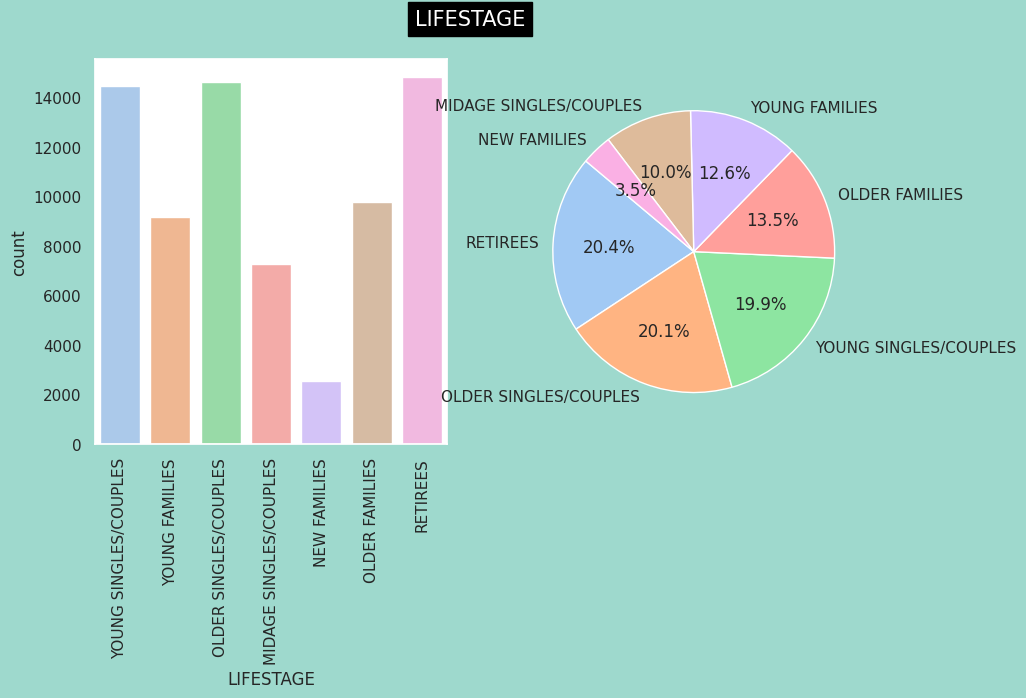

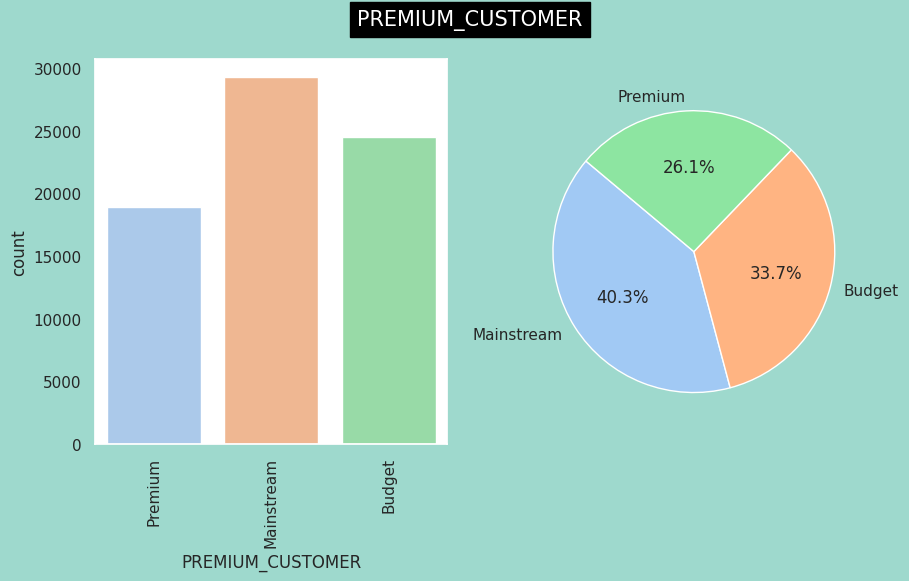

In [17]:
visualisations_objects_columns(behaviors_df)


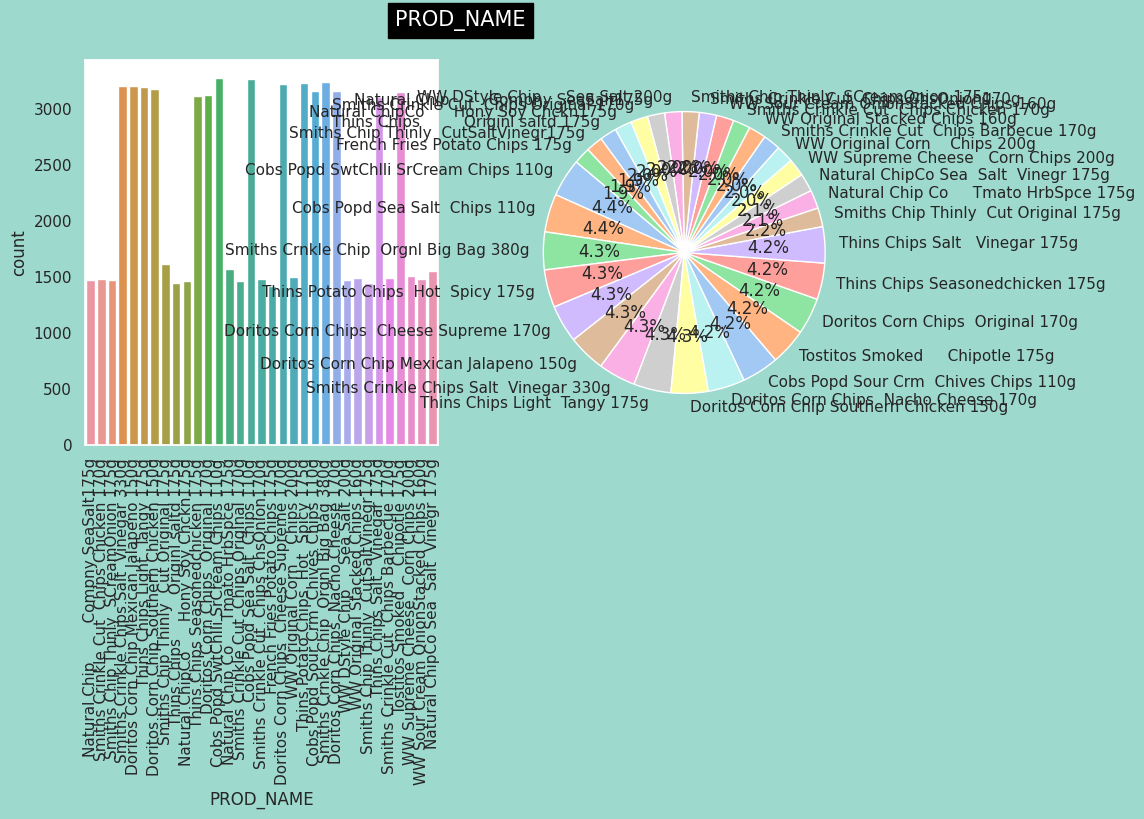

In [18]:
visualisations_objects_columns(transactions_df)


In [19]:
# Assuming transactions_df is your DataFrame
def plot_histogram_and_boxplot(transactions_df, column_name):
    plt.figure(figsize=(12, 6))

    # Plot the histogram
    plt.subplot(1, 2, 1)
    plt.hist(transactions_df[column_name], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')

    # Plot the box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=transactions_df[column_name], color='skyblue')
    plt.title(f'Box Plot of {column_name}')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

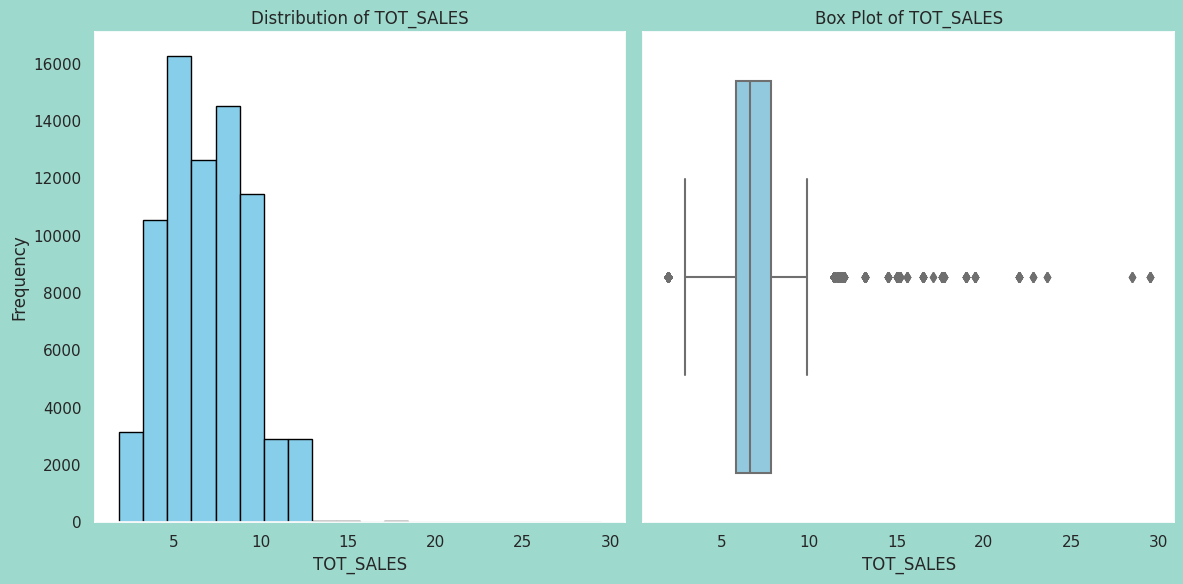

In [20]:
# Call the function with your DataFrame and column name
plot_histogram_and_boxplot(transactions_df, 'TOT_SALES')

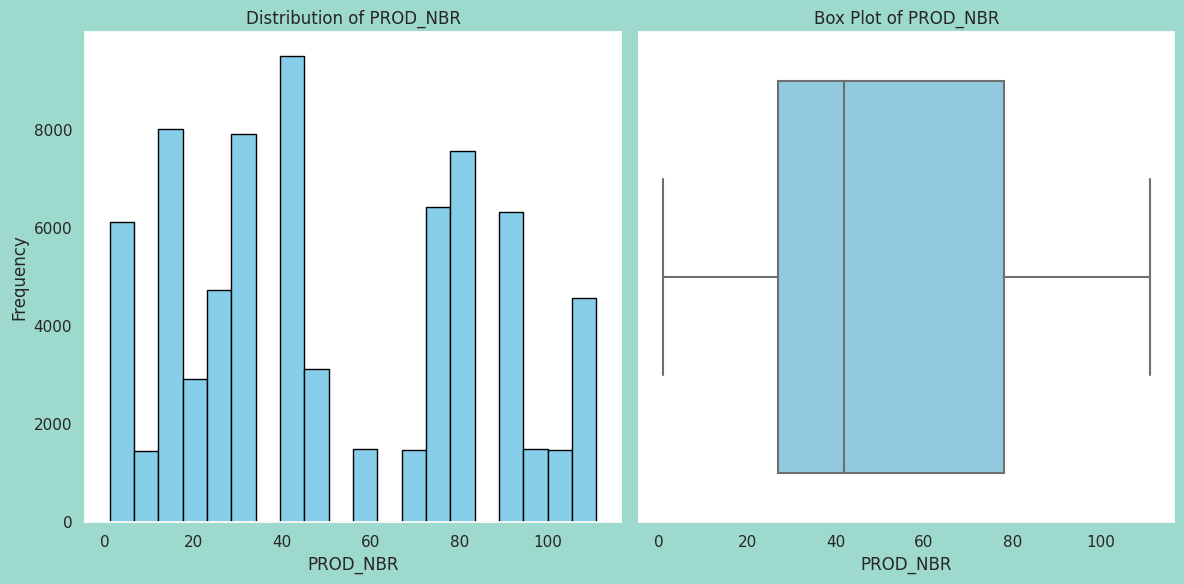

In [21]:
# Call the function with your DataFrame and column name
plot_histogram_and_boxplot(transactions_df, 'PROD_NBR')

In [22]:
# Assuming transactions_df is your DataFrame
outliersfree_transactions_df=transactions_df
outliersfree_transactions_df = transactions_df[transactions_df['PROD_QTY'] <= 25]
outliersfree_transactions_df = transactions_df[transactions_df['TOT_SALES'] <= 100]

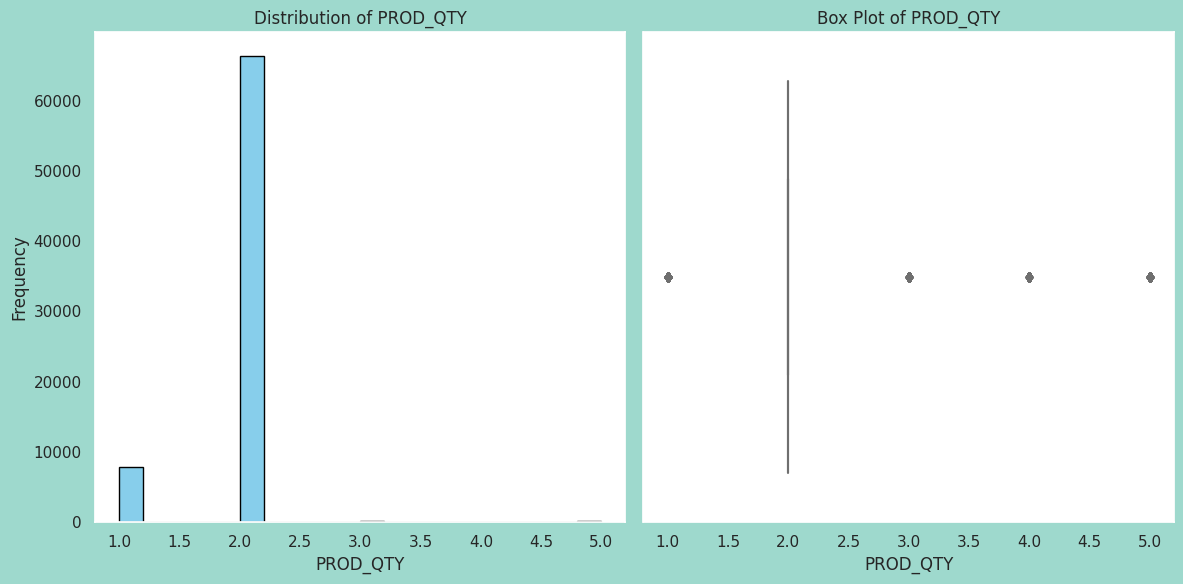

In [23]:
# Call the function with your DataFrame and column name
plot_histogram_and_boxplot(outliersfree_transactions_df, 'PROD_QTY')

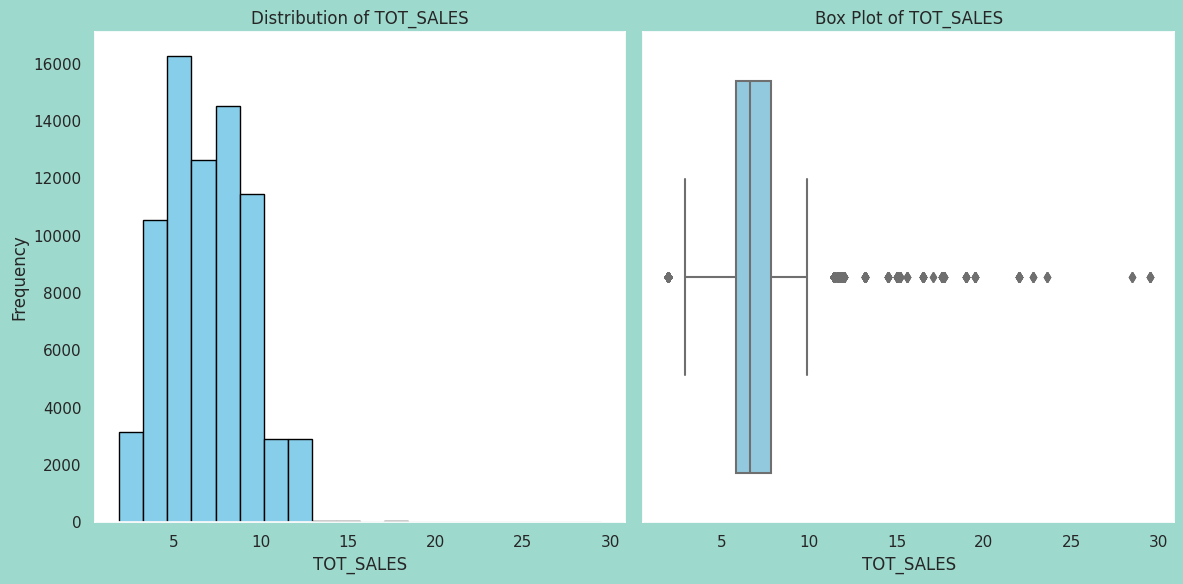

In [24]:
# Call the function with your DataFrame and column name
plot_histogram_and_boxplot(outliersfree_transactions_df, 'TOT_SALES')

In [25]:
# Count the number of transactions by date
transaction_count_by_date = outliersfree_transactions_df.groupby('DATE').size()
count_unique_dates = len(transaction_count_by_date)

print(f"The number of unique dates in the transaction count: {count_unique_dates}")


The number of unique dates in the transaction count: 364


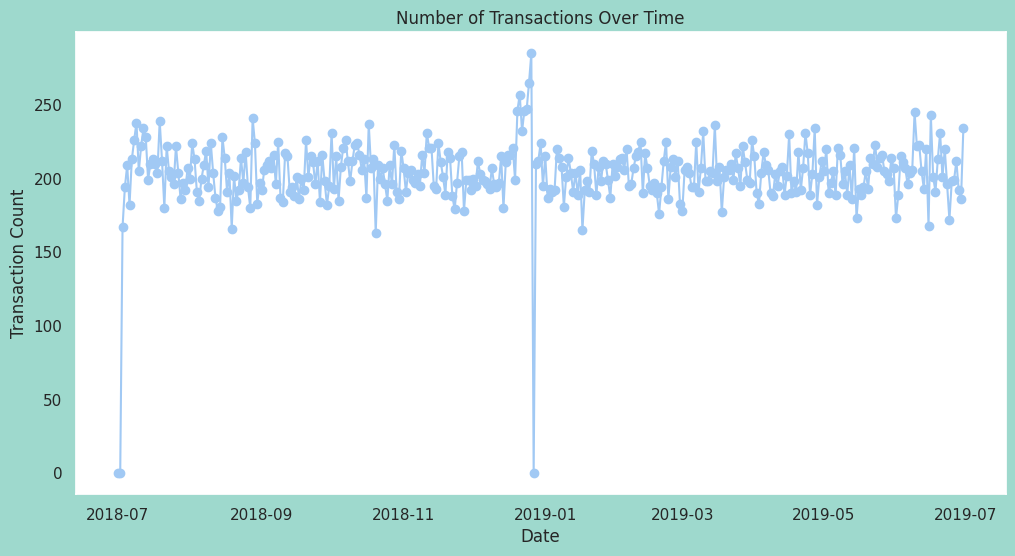

In [26]:
# Assuming transactions_df is your DataFrame
# Assuming 'DATE' is in datetime format

# Generate the sequence of dates
date_sequence = pd.date_range(start='2018-07-01', end='2019-06-30', freq='D')

# Count the number of transactions for each date in the sequence
transaction_count_by_date = outliersfree_transactions_df.groupby('DATE').size()

# Reindex the count series with the date sequence and fill missing values with 0
transaction_count_by_date = transaction_count_by_date.reindex(date_sequence, fill_value=0)

# Plot the number of transactions over time
plt.figure(figsize=(12, 6))
plt.plot(transaction_count_by_date.index, transaction_count_by_date.values, marker='o', linestyle='-')
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.show()

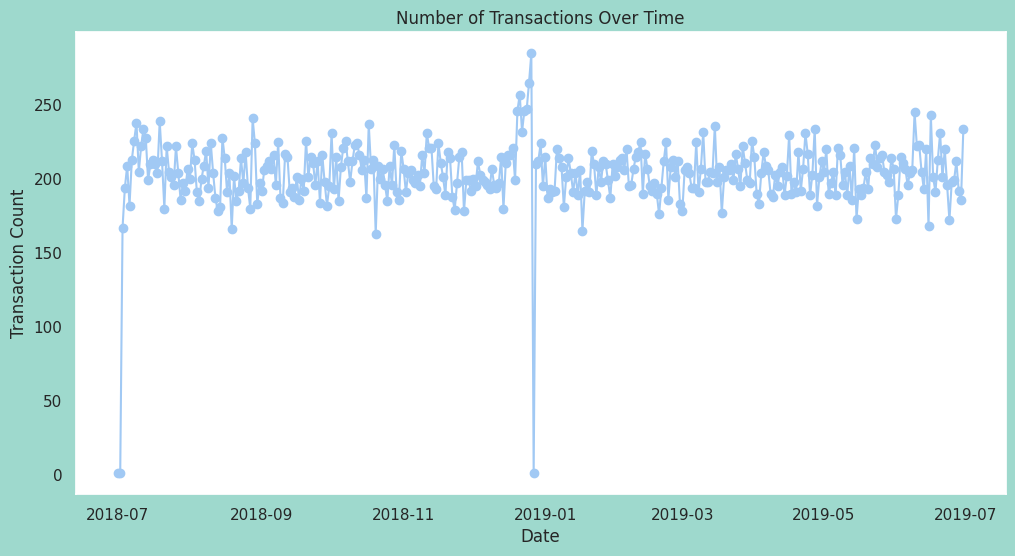

In [27]:
# Assuming transactions_df is your DataFrame
# Assuming 'DATE' is in datetime format

# Generate the sequence of dates
date_sequence = pd.date_range(start='2018-07-01', end='2019-06-30', freq='D')

# Create a DataFrame with the date sequence
date_df = pd.DataFrame({'DATE': date_sequence})

# Merge the original DataFrame with the date DataFrame using a left join
merged_df = pd.merge(date_df, transactions_df, on='DATE', how='left')

# Count the number of transactions for each date in the merged DataFrame
transaction_count_by_date = merged_df.groupby('DATE').size()

# Plot the number of transactions over time
plt.figure(figsize=(12, 6))
plt.plot(transaction_count_by_date.index, transaction_count_by_date.values, marker='o', linestyle='-')
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.show()


In [28]:
merged_df.sample(50)
# Assuming your_dataframe is your DataFrame in Python
merged_df.dropna(inplace=True)



In [29]:
# Define a function to extract and parse the numbers from the product name
def parse_pack_size(product_name):
    match = re.search(r'(\d+)', product_name)  # Extract digits using a regular expression
    return int(match.group()) if match else None  # Convert to integer if a match is found, otherwise return None

# Assuming your_dataframe is your DataFrame in Python with 'PROD_NAME' column
merged_df['PACK_SIZE'] = merged_df['PROD_NAME'].apply(parse_pack_size)

# Display the DataFrame with the new 'PACK_SIZE' column
merged_df.sample(20)
#merged_df.shape

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
20143,2018-10-09,109.0,109183.0,111265.0,80.0,Natural ChipCo Sea Salt Vinegr 175g,2.0,6.0,175
56033,2019-04-03,71.0,71083.0,69455.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,2.0,11.8,380
42728,2019-01-28,116.0,116070.0,119540.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,2.0,11.8,380
49452,2019-03-02,80.0,80313.0,79493.0,16.0,Smiths Crinkle Chips Salt Vinegar 330g,2.0,11.4,330
53363,2019-03-21,145.0,145068.0,145270.0,90.0,Tostitos Smoked Chipotle 175g,1.0,4.4,175
2871,2018-07-16,259.0,259003.0,257411.0,61.0,Smiths Crinkle Cut Chips Chicken 170g,2.0,5.8,170
71021,2019-06-15,197.0,197050.0,196967.0,111.0,Smiths Chip Thinly Cut Original 175g,2.0,6.0,175
54688,2019-03-27,175.0,175384.0,176940.0,2.0,Cobs Popd Sour Crm Chives Chips 110g,2.0,7.6,110
37774,2019-01-03,173.0,173344.0,174915.0,93.0,Doritos Corn Chip Southern Chicken 150g,2.0,7.8,150
19569,2018-10-07,10.0,10207.0,10263.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,2.0,11.8,380


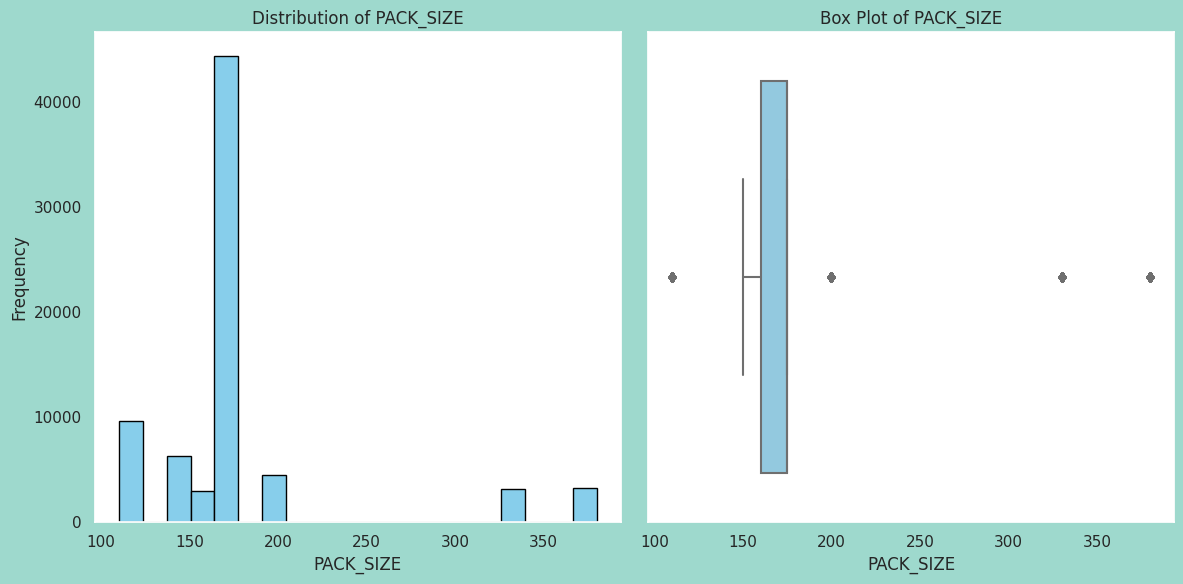

In [30]:
#Plot a histogram showing the number of transactions by pack size
plot_histogram_and_boxplot(merged_df, 'PACK_SIZE')

In [31]:
# Assuming df is your DataFrame and "PROD_NAME" is the column
merged_df['PROD_NAME'] = merged_df['PROD_NAME'].str.split().str.join(' ')
merged_df['Brand_name'] = merged_df['PROD_NAME'].str.split().str[0]
merged_df.sample(30)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,Brand_name
60310,2019-04-24,199.0,199107.0,198028.0,33.0,Cobs Popd SwtChlli SrCream Chips 110g,2.0,7.6,110,Cobs
74027,2019-06-30,176.0,176312.0,177288.0,75.0,Cobs Popd Sea Salt Chips 110g,1.0,3.8,110,Cobs
60842,2019-04-27,230.0,230107.0,232632.0,90.0,Tostitos Smoked Chipotle 175g,2.0,8.8,175,Tostitos
13779,2018-09-08,71.0,71076.0,69408.0,83.0,WW DStyle Chip Sea Salt 200g,2.0,3.8,200,WW
20582,2018-10-11,226.0,226074.0,226595.0,90.0,Tostitos Smoked Chipotle 175g,2.0,8.8,175,Tostitos
51291,2019-03-11,3.0,3239.0,2151.0,16.0,Smiths Crinkle Chips Salt Vinegar 330g,2.0,11.4,330,Smiths
73865,2019-06-29,24.0,24189.0,21371.0,27.0,WW Supreme Cheese Corn Chips 200g,2.0,3.8,200,WW
43746,2019-02-02,100.0,100235.0,100003.0,106.0,Natural ChipCo Hony Soy Chckn175g,2.0,6.0,175,Natural
38793,2019-01-08,205.0,205119.0,204185.0,96.0,WW Original Stacked Chips 160g,1.0,1.9,160,WW
40067,2019-01-14,235.0,235254.0,238279.0,44.0,Thins Chips Light Tangy 175g,2.0,6.6,175,Thins


TypeError: ignored

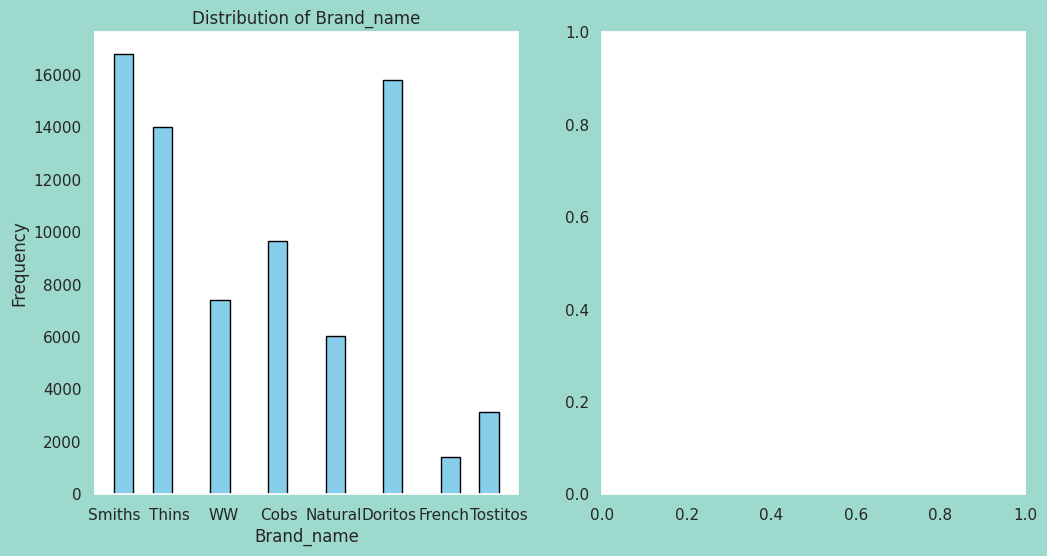

In [32]:
#Plot a histogram showing the number of transactions by pack size
plot_histogram_and_boxplot(merged_df, 'Brand_name')

In [33]:
joined_df = merged_df.merge(behaviors_df, how='left', on='LYLTY_CARD_NBR')
# joined_df.dropna
# joined_df.shape
joined_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,Brand_name,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-03,47.0,47142.0,42540.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,2.0,11.8,380,Smiths,MIDAGE SINGLES/COUPLES,Budget
1,2018-07-03,68.0,68193.0,65598.0,44.0,Thins Chips Light Tangy 175g,2.0,6.6,175,Thins,MIDAGE SINGLES/COUPLES,Budget
2,2018-07-03,269.0,269175.0,266094.0,28.0,Thins Potato Chips Hot Spicy 175g,2.0,6.6,175,Thins,MIDAGE SINGLES/COUPLES,Budget
3,2018-07-03,26.0,26197.0,23145.0,44.0,Thins Chips Light Tangy 175g,2.0,6.6,175,Thins,MIDAGE SINGLES/COUPLES,Mainstream
4,2018-07-03,67.0,67107.0,64442.0,21.0,WW Sour Cream OnionStacked Chips 160g,2.0,3.8,160,WW,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
74136,2019-06-30,238.0,238059.0,242130.0,16.0,Smiths Crinkle Chips Salt Vinegar 330g,2.0,11.4,330,Smiths,YOUNG SINGLES/COUPLES,Mainstream
74137,2019-06-30,48.0,48241.0,44533.0,22.0,Thins Chips Originl saltd 175g,2.0,6.6,175,Thins,YOUNG SINGLES/COUPLES,Premium
74138,2019-06-30,129.0,129139.0,133055.0,106.0,Natural ChipCo Hony Soy Chckn175g,2.0,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
74139,2019-06-30,202.0,202258.0,202053.0,2.0,Cobs Popd Sour Crm Chives Chips 110g,2.0,7.6,110,Cobs,YOUNG SINGLES/COUPLES,Premium


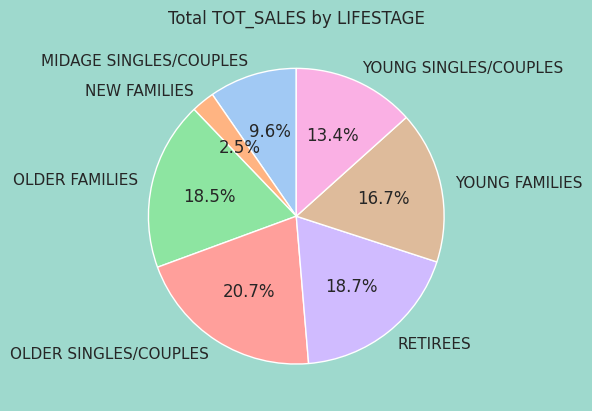

In [34]:
import matplotlib.pyplot as plt

def pie_data(df, column1, column2):
    # Assuming column1 and column2 are valid columns in df
    pie_data = df.groupby(column1)[column2].sum()

    # Plotting the pie chart
    plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Total {column2} by {column1}')
    plt.show()

# Example usage
pie_data(joined_df, 'LIFESTAGE', 'TOT_SALES')


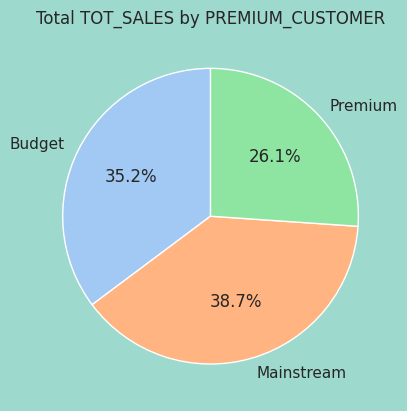

In [35]:
pie_data(joined_df, 'PREMIUM_CUSTOMER', 'TOT_SALES')

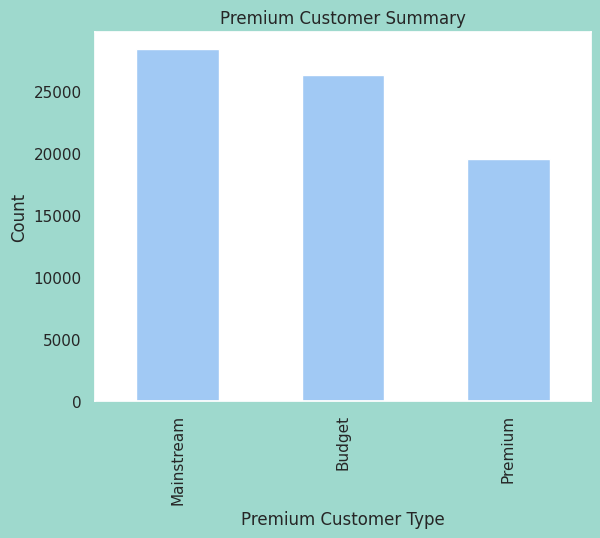

In [36]:
#How many customers are in each segment
premium_customer_summary = joined_df['PREMIUM_CUSTOMER'].value_counts()

# Assuming 'PREMIUM_CUSTOMER' is a valid column in joined_df
premium_customer_summary = joined_df['PREMIUM_CUSTOMER'].value_counts()

# Plotting the bar chart
premium_customer_summary.plot(kind='bar')
plt.title('Premium Customer Summary')
plt.xlabel('Premium Customer Type')
plt.ylabel('Count')
plt.show()


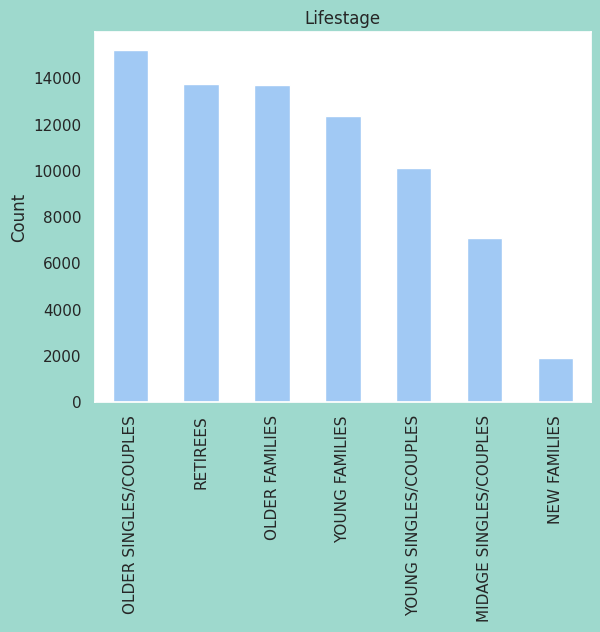

In [37]:
#How many customers are in each segment
premium_customer_summary = joined_df['LIFESTAGE'].value_counts()

# Assuming 'PREMIUM_CUSTOMER' is a valid column in joined_df
premium_customer_summary = joined_df['LIFESTAGE'].value_counts()

# Plotting the bar chart
premium_customer_summary.plot(kind='bar')
plt.title('Lifestage')
plt.ylabel('Count')
plt.show()

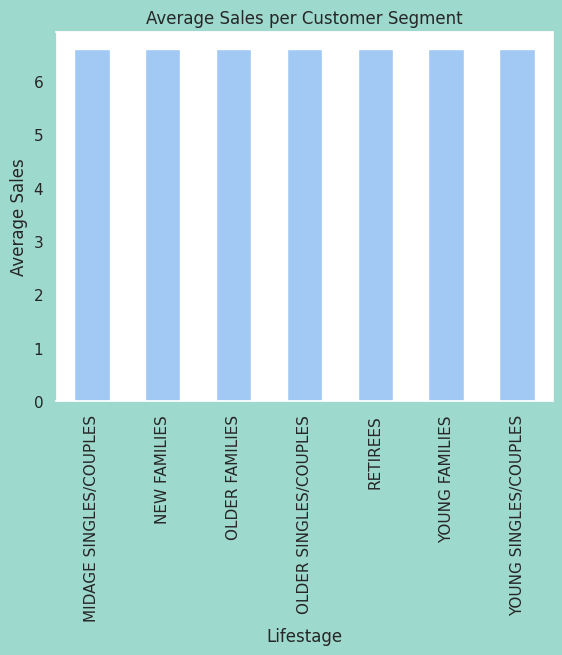

In [38]:
#How many chips are bought per customer by segment


# Assuming 'TOT_SALES' and 'LIFESTAGE' are valid columns in joined_df
average_sales_per_customer = joined_df.groupby('LIFESTAGE')['TOT_SALES'].median()

# Plotting the bar chart
average_sales_per_customer.plot(kind='bar')
plt.title('Average Sales per Customer Segment')
plt.xlabel('Lifestage')
plt.ylabel('Average Sales')
plt.show()


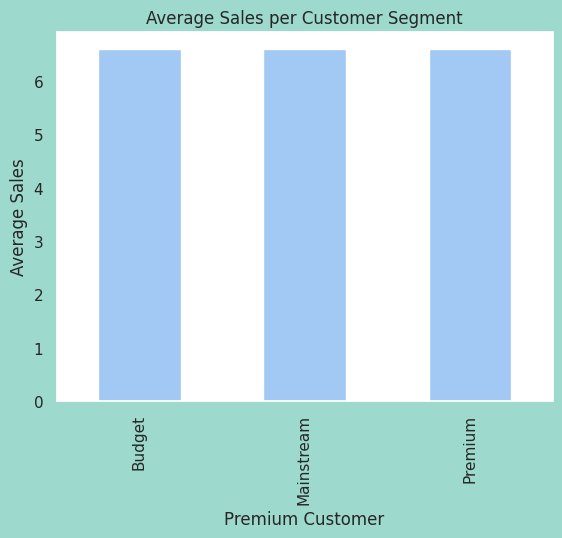

In [39]:
#How many chips are bought per customer by segment


# Assuming 'TOT_SALES' and 'LIFESTAGE' are valid columns in joined_df
average_sales_per_customer = joined_df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].median()

# Plotting the bar chart
average_sales_per_customer.plot(kind='bar')
plt.title('Average Sales per Customer Segment')
plt.xlabel('Premium Customer')
plt.ylabel('Average Sales')
plt.show()


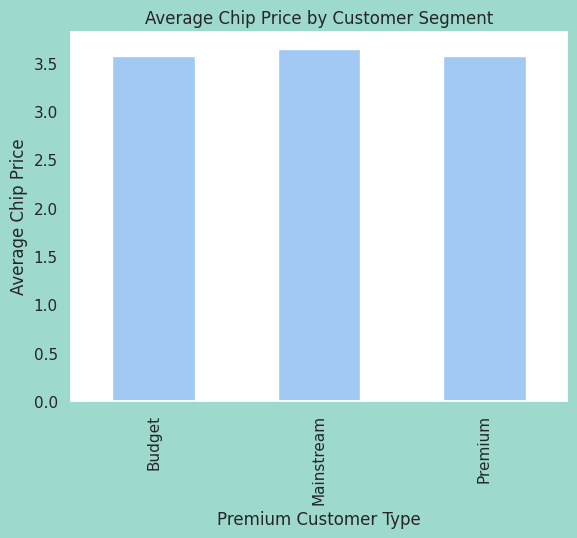

In [40]:
# Assuming 'TOT_SALES', 'PROD_QTY', and 'PREMIUM_CUSTOMER' are valid columns in joined_df
joined_df['AVERAGE_CHIP_PRICE'] = joined_df['TOT_SALES'] / joined_df['PROD_QTY']

# Group by customer segment and calculate the average chip price
average_chip_price_by_segment = joined_df.groupby('PREMIUM_CUSTOMER')['AVERAGE_CHIP_PRICE'].mean()

# Plotting the bar chart
average_chip_price_by_segment.plot(kind='bar')
plt.title('Average Chip Price by Customer Segment')
plt.xlabel('Premium Customer Type')
plt.ylabel('Average Chip Price')
plt.show()

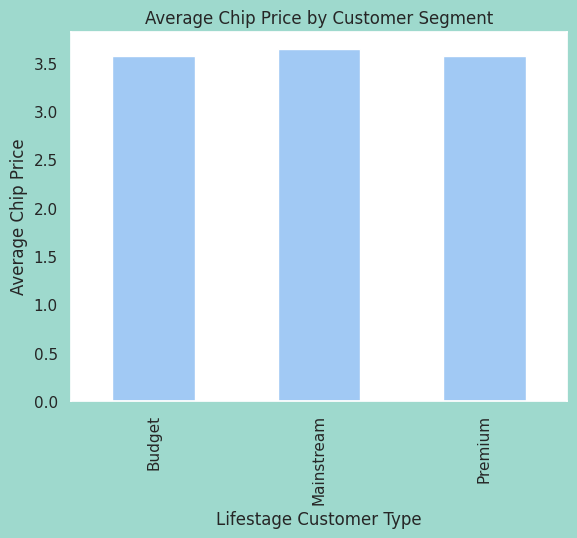

In [41]:
# Group by customer segment and calculate the average chip price
average_chip_price_by_lifestyle = joined_df.groupby('LIFESTAGE')['AVERAGE_CHIP_PRICE'].mean()

# Plotting the bar chart
average_chip_price_by_segment.plot(kind='bar')
plt.title('Average Chip Price by Customer Segment')
plt.xlabel('Lifestage Customer Type')
plt.ylabel('Average Chip Price')
plt.show()

Task 2: evaluate the performance of a store trial which was performed in stores 77, 86 and 88

In [42]:
# Add a new month ID column in the data with the format yyyymm
joined_df['MONTH'] = joined_df['DATE'].dt.strftime('%Y%m')

In [43]:
stat_per_store_month = joined_df.groupby(['STORE_NBR', 'MONTH']).agg({
    'TOT_SALES': 'sum',
    'LYLTY_CARD_NBR': 'nunique',
    'TXN_ID': 'nunique',
    'PROD_QTY': 'mean',  # Use 'mean' for average
    'PACK_SIZE': 'mean',  # Use 'mean' for average
    'AVERAGE_CHIP_PRICE': 'mean'  # Use 'mean' for average
})


In [44]:
february_2019_stat = stat_per_store_month.iloc[stat_per_store_month.index.get_level_values('MONTH') == '201902']
february_2019_stat_77_86_88 = february_2019_stat.loc[february_2019_stat.index.get_level_values('STORE_NBR').isin([77, 86, 88])]
february_2019_stat_77_86_88

,,TOT_SALES,LYLTY_CARD_NBR,TXN_ID,PROD_QTY,PACK_SIZE,AVERAGE_CHIP_PRICE
STORE_NBR,MONTH,,,,,,
77.0,201902,69.1,14,14,1.642857,192.500000,3.107143
86.0,201902,261.6,37,40,2.000000,165.625000,3.270000
88.0,201902,304.4,37,37,2.000000,163.783784,4.113514


In [62]:
#### Filter to the pre-trial period and stores with full observation periods
full_months_shops = joined_df[joined_df.groupby('STORE_NBR')['MONTH'].transform('nunique') == 12]
shopswith12months = full_months_shops['STORE_NBR'].unique()
shopswith12months

array([ 47.,  68., 269.,  26.,  67., 137., 184., 207., 230.,  18.,  23.,
       155., 199.,  24., 270., 108., 148.,  28.,  36.,  57.,  60.,  62.,
        71.,  83.,  95., 101., 169., 190., 209.,  75.,  93., 102., 128.,
       191., 222., 226.,  66., 106., 123., 153., 156., 225.,  56.,  59.,
        73.,  80.,  91., 119., 133., 152., 173., 197., 229., 235.,  45.,
       154., 160., 167., 168., 194., 217., 259.,  10.,  33.,  39., 110.,
       149., 208., 232.,  19.,  38.,  58., 111., 130., 147., 165., 238.,
       245., 254., 260.,  17.,  35.,  54., 109., 114., 118., 144., 185.,
       196., 214., 233., 237.,  20.,  63., 174., 179., 221.,  49., 122.,
       213., 236., 241., 262.,   1.,  98., 178., 216., 223.,   7.,  88.,
        97., 104., 231.,  53.,  29.,  81.,  87., 176., 182.,  74., 195.,
        78., 181., 203.,  86., 171., 200., 250., 255., 264.,   3.,  30.,
        37.,  40.,  43.,  70., 126., 166., 202.,  13.,  96., 100., 271.,
        82.,   2.,   4.,  48., 210.,  41., 113., 12